In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('geographic_dataset.csv')
display(df.sample(5))

,name,state,city,address,lattitude,longitude,type
1291,"FPL Vehicles, Ariyankuppam",Puducherry,Puducherry,"No.1 Cuddalore, Puducherry ECR Main Road , Ari...",11.8945141,79.802682,7.0
746,EESL Hotel Claridges,Delhi,New Delhi,"NDMC Parking, Side of Hotel Claridges, Tees Ja...",28.599477,77.215583,8.0
415,Akki's Bistro,Andhra pradesh,kolhapur,"CS No 1082, Chandrameela Building, Near Krishn...",16.6856931,74.208422,6.0
59,The Forum Fiza Mall AC Charging Station Mangalore,Karnataka,Thane,"Basement parking (B1), The Forum Fiza Mall, Ma...",12.8576,74.838300,12.0
1234,"IOCL Laxmi Narayan Petroleum, Changodar",Gujarat,Changodar,"National Highway 8A, Changodar, Gujarat 382210",22.9378139,72.455668,7.0


#### Dataset 1: 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1547 non-null   object 
 1   state      1547 non-null   object 
 2   city       1547 non-null   object 
 3   address    1507 non-null   object 
 4   lattitude  1541 non-null   object 
 5   longitude  1541 non-null   float64
 6   type       1539 non-null   float64
dtypes: float64(2), object(5)
memory usage: 84.7+ KB


In [3]:
df.describe()

,longitude,type
count,1.541000e+03,1539.000000
mean,1.105323e+05,9.020793
std,3.064996e+06,4.136436
min,8.058454e+00,6.000000
25%,7.562036e+01,7.000000
50%,7.721257e+01,7.000000
75%,7.847983e+01,11.000000
max,8.510551e+07,24.000000


In [4]:
df['lattitude'] = df['lattitude'].str.replace(',','').astype('float64')
df.drop(['address','type','name'],axis=1,inplace=True)
df.head()

,state,city,lattitude,longitude
0,Haryana,Gurugram,29.6019,76.9803
1,Haryana,Gurugram,28.4673,77.0818
2,Rajasthan,Behror,27.8751,76.2760
3,Uttar Pradesh,Khatauli,29.3105,77.7218
4,Uttar Pradesh,Khatauli,29.3105,77.7218


In [5]:
df.isnull().sum()

state        0
city         0
lattitude    6
longitude    6
dtype: int64

In [6]:
df=df.dropna()
df.isnull().sum()

state        0
city         0
lattitude    0
longitude    0
dtype: int64

In [7]:
df['state'].value_counts()

state
Maharashtra          255
Tamil Nadu           155
Karnataka            134
Delhi                126
Kerala                90
Uttar Pradesh         87
Gujarat               77
Telangana             75
Rajasthan             67
Haryana               60
Delhi NCR             53
West Bengal           53
Odisha                38
Andhra Pradesh        31
Andhra pradesh        24
Jharkhand             22
Uttarakhand           21
TAMIL NADU            20
Madhya Pradesh        20
Punjab                15
Chhattisgarh          12
Assam                 10
Bihar                  9
PUNJAB                 9
Goa                    8
TamilNadu              7
Himachal Pradesh       6
Maharashra             5
TELENGANA              5
Chattisgarh            4
Jammu & Kashmir        3
Jammu                  3
WestBengal             3
Uttrakhand             2
Puducherry             2
Andra Pradesh          2
Sikkim                 2
Uttarakhand            2
chattisgarh            2
Chandigarh         

In [8]:
df['state']=df['state'].replace('Hisar','Haryana')
df['state']=df['state'].replace('TamiNadu','Tamil Nadu')
df['state']=df['state'].replace('TAMIL NADU','Tamil Nadu')
df['state']=df['state'].replace('Ernakulam','Kerala')
df['state']=df['state'].replace('Harayana','Haryana')
df['state']=df['state'].replace('Chikhali','Rajasthan')
df['state']=df['state'].replace('AndhraPradesh','Andhra Pradesh')
df['state']=df['state'].replace('Jammu and Kashmir','Jammu & Kashmir')
df['state']=df['state'].replace('Jammu','Jammu & Kashmir')
df['state']=df['state'].replace('Andhra pradesh','Andhra Pradesh')
df['state']=df['state'].replace('Bhubhaneswar','Odisha')
df['state']=df['state'].replace('Hyderabad','Telangana')
df['state']=df['state'].replace('TELENGANA','Telangana')
df['state']=df['state'].replace('Kochi','Kerala')
df['state']=df['state'].replace('Karala','Kerala')
df['state']=df['state'].replace('Uttarkhand','Uttarakhand')
df['state']=df['state'].replace('Hyderabadu00a0','Telangana')
df['state']=df['state'].replace('Chattisgarh','Chhattisgarh')
df['state']=df['state'].replace('WestBengal','West Bengal')
df['state']=df['state'].replace('Jajpur','Rajasthan')
df['state']=df['state'].replace('Limbdi','Gujarat')
df['state']=df['state'].replace('Pondicherry','Puducherry')
df['state']=df['state'].replace('Maharashra','Maharashtra')
df['state']=df['state'].replace('PUNJAB','Punjab')
df['state']=df['state'].replace('Rajahmundry','Andhra Pradesh')
df['state']=df['state'].replace('Andhra Pradesh ','Andhra Pradesh')
df['state']=df['state'].replace('Andra Pradesh','Andhra Pradesh')
df['state']=df['state'].replace('TamilNadu','Andhra Pradesh')
df['state']=df['state'].replace('chattisgarh','Chhattisgarh')

df['state'].unique()

array(['Haryana', 'Rajasthan', 'Uttar Pradesh', 'Himachal Pradesh',
       'Maharashtra', 'Delhi', 'Tamil Nadu', 'Uttarakhand', 'Gujarat',
       'Goa', 'Telangana', 'Karnataka', 'Punjab', 'Jammu & Kashmir',
       'Odisha', 'Puducherry', 'Andhra Pradesh', 'Uttrakhand',
       'West Bengal', 'Chandigarh', 'Kerala', 'Jharkhand', 'Bihar',
       'Chhattisgarh', 'Madhya Pradesh', 'Assam', 'Sikkim',
       'Uttarakhand ', 'Delhi NCR', 'Tripura', 'Andaman'], dtype=object)

In [9]:
centroid_latitude=df['lattitude'].mean()
centroid_longitude=df['longitude'].mean()
df['distance_from_centroid']=np.sqrt((df['lattitude']-centroid_latitude)**2+(df['longitude']-centroid_longitude)**2)
df.head()

,state,city,lattitude,longitude,distance_from_centroid
0,Haryana,Gurugram,29.6019,76.9803,110455.297514
1,Haryana,Gurugram,28.4673,77.0818,110455.195921
2,Rajasthan,Behror,27.8751,76.2760,110456.001677
3,Uttar Pradesh,Khatauli,29.3105,77.7218,110454.555989
4,Uttar Pradesh,Khatauli,29.3105,77.7218,110454.555989


In [10]:
df2=df
df2.sample()

,state,city,lattitude,longitude,distance_from_centroid
1369,Tamil Nadu,Salem,11.682985,78.12604,110454.151666


In [11]:
df['state_count'] = df['state'].map(df['state'].value_counts()) #importance of .map function
df.head()

,state,city,lattitude,longitude,distance_from_centroid,state_count
0,Haryana,Gurugram,29.6019,76.9803,110455.297514,62
1,Haryana,Gurugram,28.4673,77.0818,110455.195921,62
2,Rajasthan,Behror,27.8751,76.2760,110456.001677,69
3,Uttar Pradesh,Khatauli,29.3105,77.7218,110454.555989,87
4,Uttar Pradesh,Khatauli,29.3105,77.7218,110454.555989,87


In [12]:
df_og=pd.DataFrame(df)

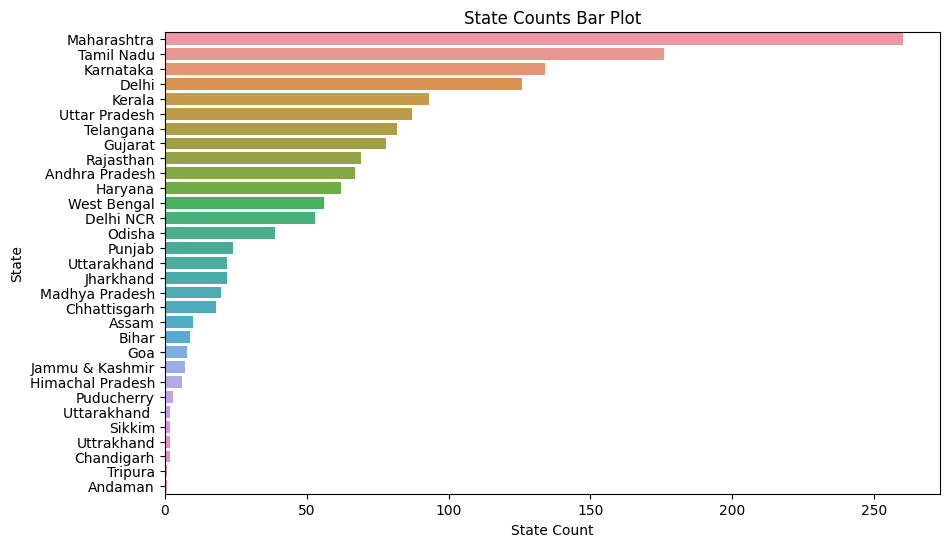

In [13]:
df_sorted = df.sort_values(by='state_count', ascending=False)

# Create a bar plot with the sorted data
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(data=df_sorted, x='state_count', y='state')

# Customize plot labels and title
plt.xlabel('State Count')
plt.ylabel('State')
plt.title('State Counts Bar Plot')

# Show the plot
plt.show()

In [14]:
df2=pd.read_csv('charging_station_highways.csv')
df2.head(3)

,Sl. No,Category,Expressways/Highways,EV Charging Stations Sanctioned
0,1,Expressways,Mumbai - Pune,10
1,2,Expressways,Ahmadabad - Vadodara,10
2,3,Expressways,Delhi Agra Yamuna,20


In [15]:
df2['Category'].value_counts()

Category
Highways       16
Expressways     9
Total           1
Name: count, dtype: int64

In [16]:
df2=df2[~(df2['Category']=='Total')]
df2['Category'].value_counts()

Category
Highways       16
Expressways     9
Name: count, dtype: int64

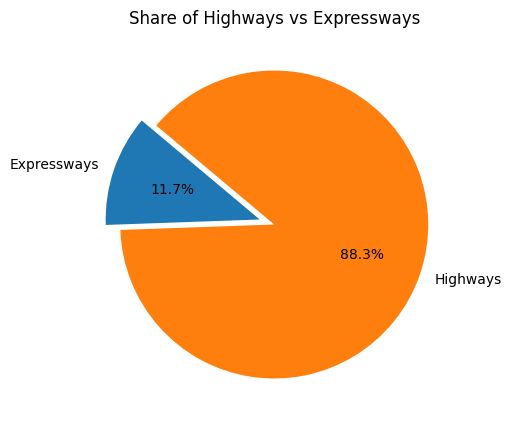

In [17]:
cat_grouped=df2.groupby(['Category'])['EV Charging Stations Sanctioned'].sum()
explode=(0.1,0)
plt.figure(figsize=(5,5))
plt.pie(cat_grouped,labels=cat_grouped.index,autopct='%1.1f%%',startangle=140, explode=explode)
plt.title('Share of Highways vs Expressways')
plt.show()

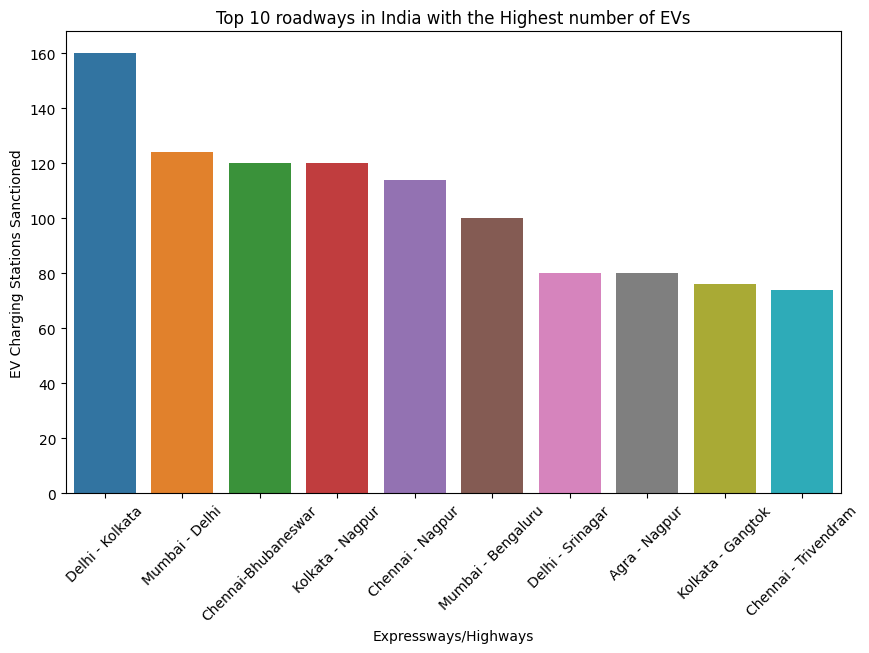

In [18]:
best_10=df2.sort_values(by='EV Charging Stations Sanctioned',ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Expressways/Highways',y='EV Charging Stations Sanctioned',data=best_10)
plt.xticks(rotation=45)
plt.title('Top 10 roadways in India with the Highest number of EVs')
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1541 entries, 0 to 1546
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   1541 non-null   object 
 1   city                    1541 non-null   object 
 2   lattitude               1541 non-null   float64
 3   longitude               1541 non-null   float64
 4   distance_from_centroid  1541 non-null   float64
 5   state_count             1541 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 84.3+ KB


In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['city']=le.fit_transform(df['city'])
df['state']=le.fit_transform(df['state'])
df.head()

,state,city,lattitude,longitude,distance_from_centroid,state_count
0,10,108,29.6019,76.9803,110455.297514,62
1,10,108,28.4673,77.0818,110455.195921,62
2,21,39,27.8751,76.2760,110456.001677,69
3,26,153,29.3105,77.7218,110454.555989,87
4,26,153,29.3105,77.7218,110454.555989,87


In [21]:
df2=df
from sklearn.cluster import KMeans
X=df2.drop(['city'],axis=1,inplace=True)
X=df2.values
X

array([[1.00000000e+01, 2.96019000e+01, 7.69803000e+01, 1.10455298e+05,
        6.20000000e+01],
       [1.00000000e+01, 2.84673000e+01, 7.70818000e+01, 1.10455196e+05,
        6.20000000e+01],
       [2.10000000e+01, 2.78751000e+01, 7.62760000e+01, 1.10456002e+05,
        6.90000000e+01],
       ...,
       [1.00000000e+01, 2.84110720e+01, 7.70405460e+01, 1.10455237e+05,
        6.20000000e+01],
       [1.20000000e+01, 3.27064117e+01, 7.48792033e+01, 1.10457399e+05,
        7.00000000e+00],
       [1.40000000e+01, 1.28857160e+01, 7.48434760e+01, 1.10457434e+05,
        1.34000000e+02]])

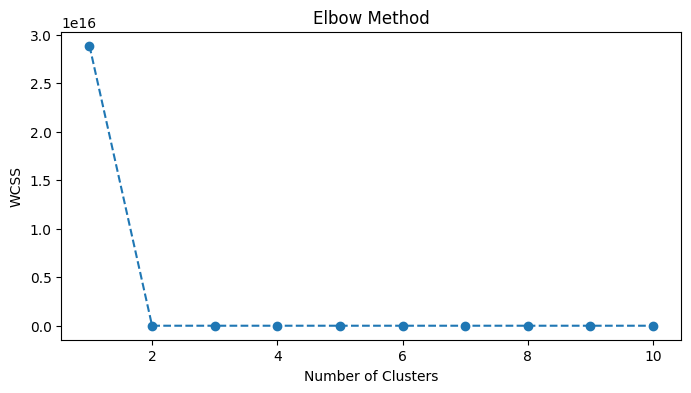

In [22]:
wcss=[]
max_clusters=10
for i in range(1,max_clusters+1):
    kmeans=KMeans(init='k-means++', n_clusters=i, max_iter=400,n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(8,4))
plt.plot(range(1,max_clusters+1),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [23]:
from sklearn.metrics import silhouette_score

kmean=KMeans(init='k-means++', n_clusters=2, max_iter=400,n_init='auto')
df_og['Cluster']=kmean.fit_predict(X)
df['Cluster']=kmean.fit_predict(X)

silhouette_avg=silhouette_score(X,df_og['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.9999992670856372


In [24]:
df_og.to_csv('final_segmentation.csv')
df_og.columns

Index(['state', 'city', 'lattitude', 'longitude', 'distance_from_centroid',
       'state_count', 'Cluster'],
      dtype='object')

In [25]:
df_og.sample(2)

,state,city,lattitude,longitude,distance_from_centroid,state_count,Cluster
432,Haryana,Ganaur,29.157569,77.035833,110455.241943,62,0
255,Maharashtra,mumbai,19.064026,73.019715,110459.257683,260,0


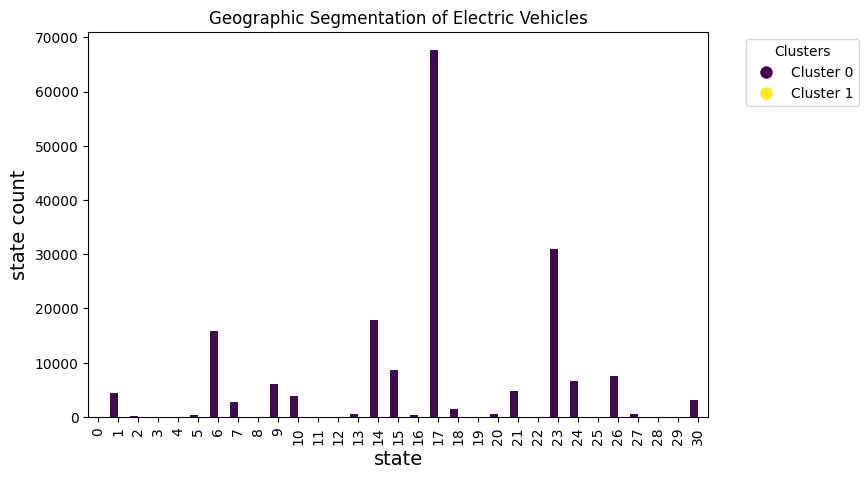

In [26]:
plt.figure(figsize=(8, 5))

# Group the data and calculate state counts
grouped = df.groupby(['Cluster', 'state']).agg({'state_count': 'sum'}).reset_index()

# Set the colormap and define cluster colors
cmap = plt.cm.get_cmap('viridis', len(grouped['Cluster'].unique()))
cluster_colors = [cmap(i) for i in range(len(grouped['Cluster'].unique()))]

# Barplot with custom colors that is cluster_colors that we had defined earlier
sns.barplot(data=grouped, x='state', y='state_count', hue='Cluster', palette=cluster_colors)
plt.xlabel('state', fontsize=14)
plt.ylabel('state count', fontsize=14)
plt.xticks(rotation=90)
plt.title('Geographic Segmentation of Electric Vehicles')

unique_labels = np.unique(df['Cluster'])
legend_labels = [f'Cluster {label}' for label in unique_labels]
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cluster_colors[i],
                      markersize=10, label=legend_labels[i]) for i in range(len(unique_labels))]

plt.legend(handles=handles, title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [27]:
df3=pd.read_csv('Ev_charger.csv')
df3.head()

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Tamil Nadu,25642,396,426,0,256
3,Karnataka,32844,568,589,57,172
4,Gujarat,22359,254,423,22,228


In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    24 non-null     object
 1   2W        24 non-null     int64 
 2   3W        24 non-null     int64 
 3   4W        24 non-null     int64 
 4   Bus       24 non-null     int64 
 5   Chargers  24 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.2+ KB


In [29]:
df3.describe()

,2W,3W,4W,Bus,Chargers
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,8421.458333,3853.166667,334.041667,28.500000,106.791667
std,10942.261145,8850.690961,476.930628,63.771331,96.623869
min,187.000000,234.000000,12.000000,0.000000,10.000000
25%,848.000000,512.750000,34.750000,0.000000,25.000000
50%,2967.500000,931.000000,129.000000,0.000000,67.500000
75%,10697.750000,2659.250000,434.000000,5.500000,180.250000
max,38558.000000,42881.000000,1895.000000,197.000000,317.000000


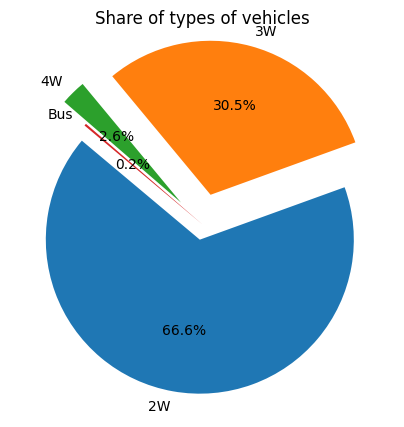

In [30]:
wheels=['2W','3W','4W','Bus']
sums=[]
for wheel in wheels:
    sums.append(df3[wheel].sum())
sums

explode=(0.1,0.2,0.2,0)
plt.figure(figsize=(5,5))
plt.pie(sums,labels=wheels,autopct='%1.1f%%',startangle=140, explode=explode)
plt.title('Share of types of vehicles')
plt.show()

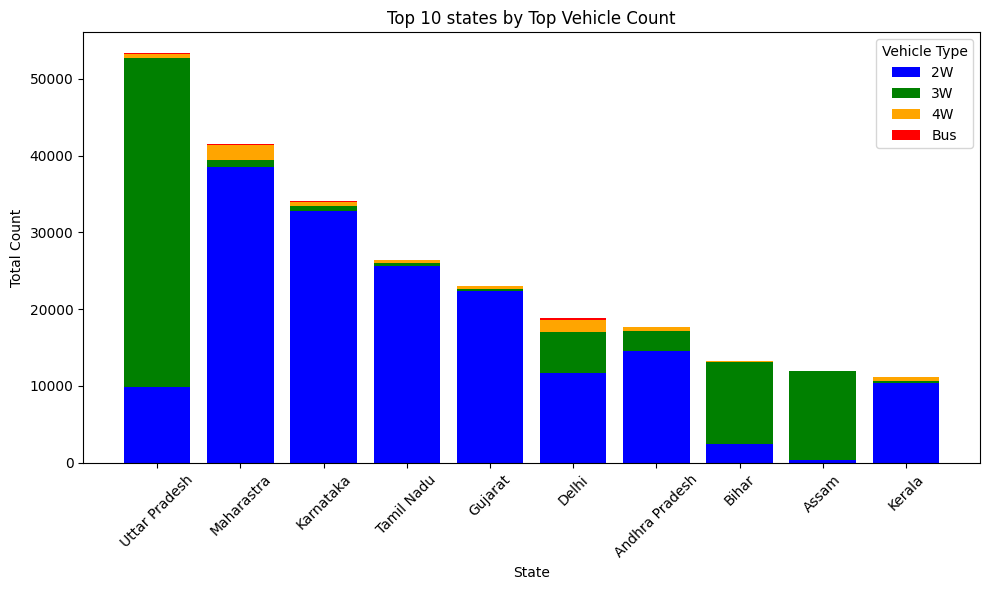

In [31]:
df3['Total_EV']=df3['2W']+df3['3W']+df3['4W']+df3['Bus']
top_10_states = df3.sort_values(by='Total_EV', ascending=False).head(10)
colors = ['blue', 'green', 'orange', 'red']

def plot_bar(df,title):
    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    bottom = None
    for i, vehicle_type in enumerate(['2W', '3W', '4W', 'Bus']):
        plt.bar(
            df['Region'],
            df[vehicle_type],
            label=vehicle_type,
            bottom=bottom,
            color=colors[i],
        )
        if bottom is None:
            bottom = df[vehicle_type]
        else:
            bottom += df[vehicle_type]
    
    plt.xlabel('State')
    plt.ylabel('Total Count')
    plt.title(title)
    plt.legend(title='Vehicle Type', loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
plot_bar(top_10_states,'Top 10 states by Top Vehicle Count')

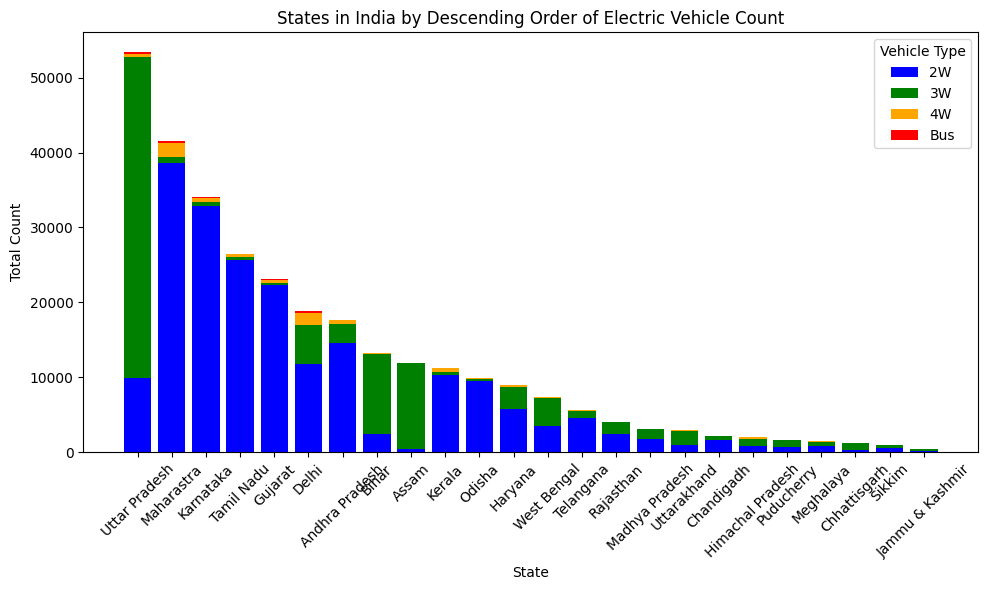

In [32]:
plot_bar(df3.sort_values(by='Total_EV', ascending=False),'States in India by Descending Order of Electric Vehicle Count')

In [33]:
df3 = df3.rename(columns={'Region': 'state'})
df_sorted.head(4)

,state,city,lattitude,longitude,distance_from_centroid,state_count
1173,Maharashtra,Nashik,19.950077,73.749175,110458.528220,260
1187,Maharashtra,Pune,18.648576,73.798872,110458.478531,260
227,Maharashtra,gurugram,28.449350,77.031597,110455.246123,260
419,Maharashtra,mumbai,18.650997,72.874071,110459.403332,260


In [34]:
df3['state'].unique()

array(['Uttar Pradesh', 'Maharastra', 'Tamil Nadu', 'Karnataka',
       'Gujarat', 'Delhi', 'Bihar', 'Assam', 'Kerala', 'Odisha',
       'Andhra Pradesh', 'Rajasthan', 'Madhya Pradesh', 'West Bengal',
       'Telangana', 'Chandigadh', 'Haryana', 'Meghalaya', 'Sikkim',
       'Jammu & Kashmir', 'Chhattisgarh', 'Uttarakhand', 'Puducherry',
       'Himachal Pradesh'], dtype=object)

In [35]:
df3['state']=df3['state'].replace('Maharastra','Maharashtra')

In [36]:
state=df_sorted['state'].unique()[:-5]
state_count=df_sorted['state_count'].unique()
df4=pd.DataFrame({'state': state, 'State_Count': state_count})
df4
# len(state),len(state_count)
new_df=df4.merge(df3,on='state')
new_df

,state,State_Count,2W,3W,4W,Bus,Chargers,Total_EV
0,Maharashtra,260,38558,893,1895,186,317,41532
1,Tamil Nadu,176,25642,396,426,0,256,26464
2,Karnataka,134,32844,568,589,57,172,34058
3,Delhi,126,11756,5287,1578,186,72,18807
4,Kerala,93,10345,308,578,0,131,11231
5,Uttar Pradesh,87,9852,42881,458,197,207,53388
6,Telangana,82,4578,898,186,0,70,5662
7,Gujarat,78,22359,254,423,22,228,23058
8,Rajasthan,69,2387,1578,24,0,205,3989
9,Andhra Pradesh,67,14578,2587,524,0,266,17689


In [37]:
new_df['Chargers/Evs']=new_df['Chargers']/new_df['Total_EV']
new_df.head(4)

,state,State_Count,2W,3W,4W,Bus,Chargers,Total_EV,Chargers/Evs
0,Maharashtra,260,38558,893,1895,186,317,41532,0.007633
1,Tamil Nadu,176,25642,396,426,0,256,26464,0.009674
2,Karnataka,134,32844,568,589,57,172,34058,0.005050
3,Delhi,126,11756,5287,1578,186,72,18807,0.003828


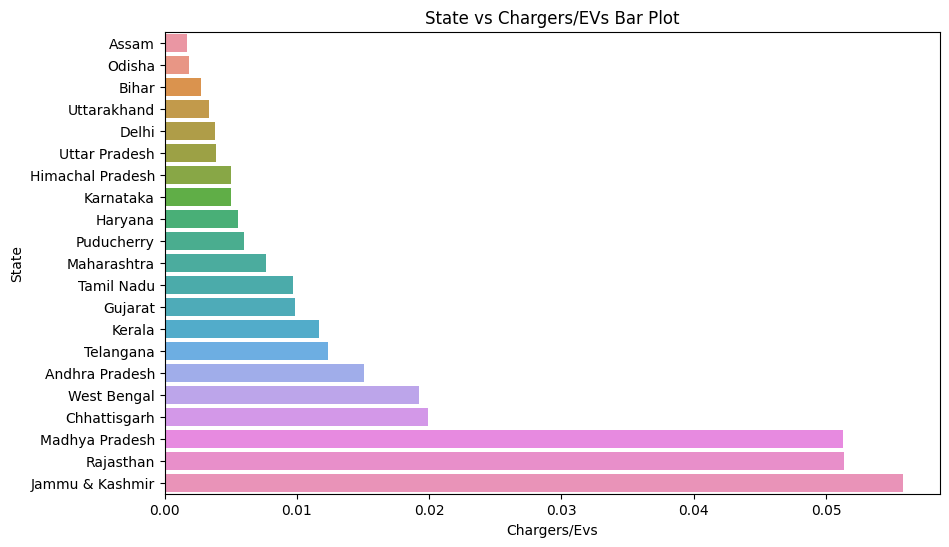

In [38]:
# Create a bar plot with the sorted data
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(data=new_df.sort_values(by='Chargers/Evs', ascending=True), x='Chargers/Evs', y='state')

# Customize plot labels and title
plt.xlabel('Chargers/Evs')
plt.ylabel('State')
plt.title('State vs Chargers/EVs Bar Plot')

# Show the plot
plt.show()

In [39]:
new_df.columns

Index(['state', 'State_Count', '2W', '3W', '4W', 'Bus', 'Chargers', 'Total_EV',
       'Chargers/Evs'],
      dtype='object')

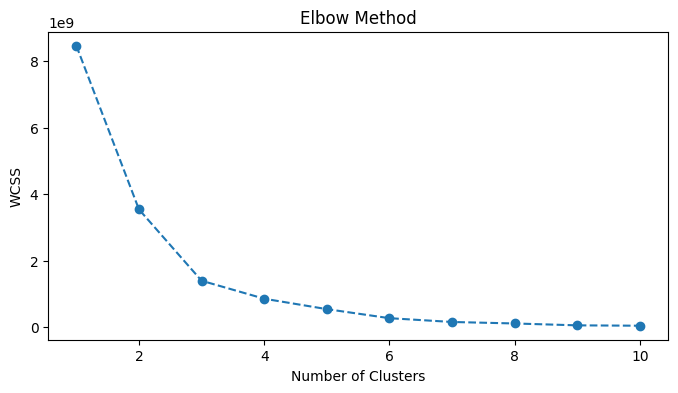

In [40]:
from sklearn.cluster import KMeans
# X=df[num_cols+cat_cols]
wcss=[]
max_clusters=10
for i in range(1,max_clusters+1):
    kmeans=KMeans(init='k-means++', n_clusters=i, max_iter=400,n_init='auto')
    kmeans.fit(new_df.drop(['state'],axis=1))
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(8,4))
plt.plot(range(1,max_clusters+1),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [41]:
from sklearn.metrics import silhouette_score
optimal_clusters = 3

# Perform segmentation using K-Means
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
new_df['Cluster'] = kmeans.fit_predict(new_df.drop(['state'],axis=1))

# Evaluate the segmentation (e.g., using silhouette score)
silhouette_avg = silhouette_score(new_df.drop(['state','Cluster'],axis=1), new_df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6329170742523934


C:\Users\Shouvik Dey\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


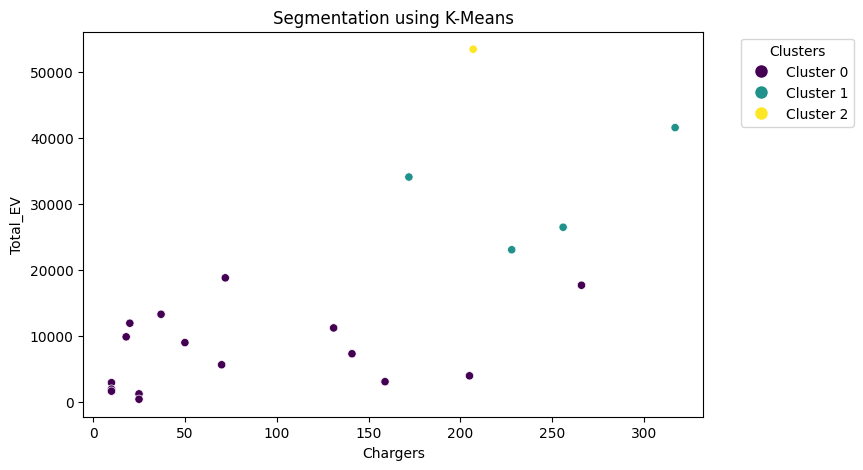

In [42]:
cmap = plt.cm.get_cmap('viridis', len(new_df['Cluster'].unique()))
cluster_colors = [cmap(i) for i in range(len(new_df['Cluster'].unique()))]

plt.figure(figsize=(8, 5))
# Scatterplot with custom colors
sns.scatterplot(data=new_df, x='Chargers', y='Total_EV', hue='Cluster', palette=cluster_colors)
plt.title('Segmentation using K-Means')
unique_labels = np.unique(new_df['Cluster'])
legend_labels = [f'Cluster {label}' for label in unique_labels]
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cluster_colors[i],
                      markersize=10, label=legend_labels[i]) for i in range(len(unique_labels))]

plt.legend(handles=handles, title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

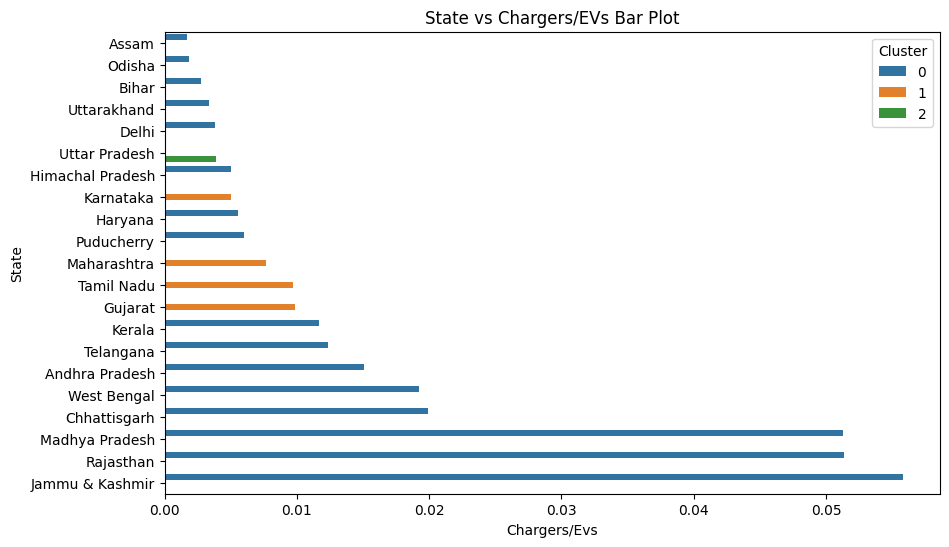

In [43]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(data=new_df.sort_values(by='Chargers/Evs', ascending=True), x='Chargers/Evs', y='state',hue='Cluster')

# Customize plot labels and title
plt.xlabel('Chargers/Evs')
plt.ylabel('State')
plt.title('State vs Chargers/EVs Bar Plot')

# Show the plot
plt.show()

In [44]:
unique_clusters = new_df['Cluster'].unique()

for cluster_value in unique_clusters:
    # Create a subset of the DataFrame for the current cluster
    cluster_data = new_df[new_df['Cluster'] == cluster_value]
    
    summary_stats = cluster_data.describe()
    print(f"Summary statistics for Cluster {cluster_value}:\n{summary_stats}\n")

Summary statistics for Cluster 1:
       State_Count           2W          3W           4W         Bus  \
count     4.000000      4.00000    4.000000     4.000000    4.000000   
mean    162.000000  29850.75000  527.750000   833.250000   66.250000   
std      76.681158   7271.30531  275.272441   712.069461   83.212078   
min      78.000000  22359.00000  254.000000   423.000000    0.000000   
25%     120.000000  24821.25000  360.500000   425.250000   16.500000   
50%     155.000000  29243.00000  482.000000   507.500000   39.500000   
75%     197.000000  34272.50000  649.250000   915.500000   89.250000   
max     260.000000  38558.00000  893.000000  1895.000000  186.000000   

         Chargers      Total_EV  Chargers/Evs  Cluster  
count    4.000000      4.000000      4.000000      4.0  
mean   243.250000  31278.000000      0.008061      1.0  
std     60.306854   8238.444675      0.002250      0.0  
min    172.000000  23058.000000      0.005050      1.0  
25%    214.000000  25612.500000 